In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/train.tsv")

ParserError: Error tokenizing data. C error: Expected 2 fields in line 83, saw 3


In [5]:
tsv_file='test.tsv'


csv_table=pd.read_table(tsv_file,sep='\t')


csv_table.to_csv('test.csv',index=False)

In [6]:
data = pd.read_csv("/content/train.csv")

In [7]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [11]:
data = pd.read_csv("/content/train.csv")

In [12]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [13]:
data.shape

(156060, 4)

In [14]:
data = data.iloc[:10000,:]

In [15]:
data.shape

(10000, 4)

In [16]:
data["Sentiment"].value_counts()

,count
Sentiment,
2,5638
3,1860
1,1633
4,488
0,381


<Axes: xlabel='Sentiment'>

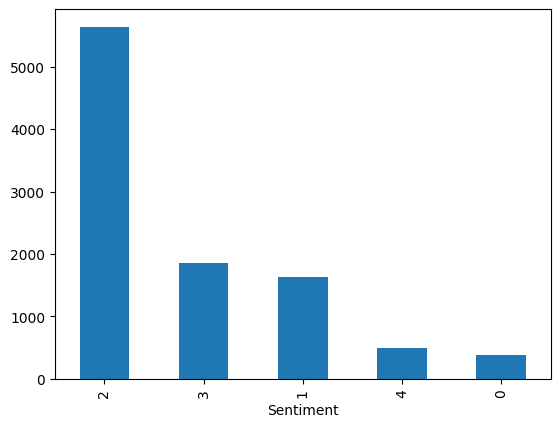

In [17]:
data["Sentiment"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'label distribution')

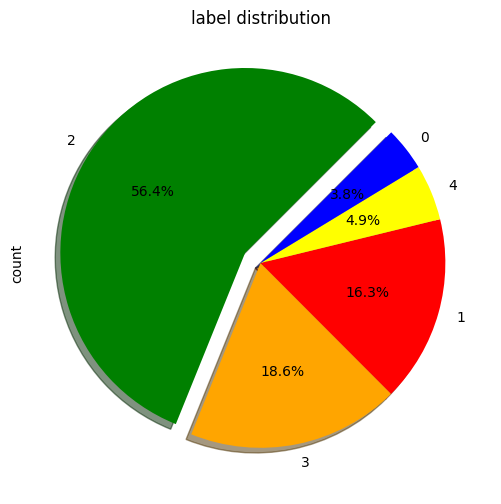

In [20]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange',"red","yellow","blue"]
data['Sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0.1,0,0,0,0))
plt.title('label distribution')

In [23]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [26]:
preprocessing('this is my tags <h1> :) <p>hello world<p> <div> <div> </h2>')

'tag hello world :)'

In [27]:
data['text'] = data['Phrase'].apply(lambda x: preprocessing(x))

In [28]:
data["text"]

,text
0,seri escapad demonstr adag good goos also good...
1,seri escapad demonstr adag good goos
2,seri
3,
4,seri
...,...
9995,play like corni televis product bygon era
9996,play like corni televis
9997,like corni televis
9998,corni televis


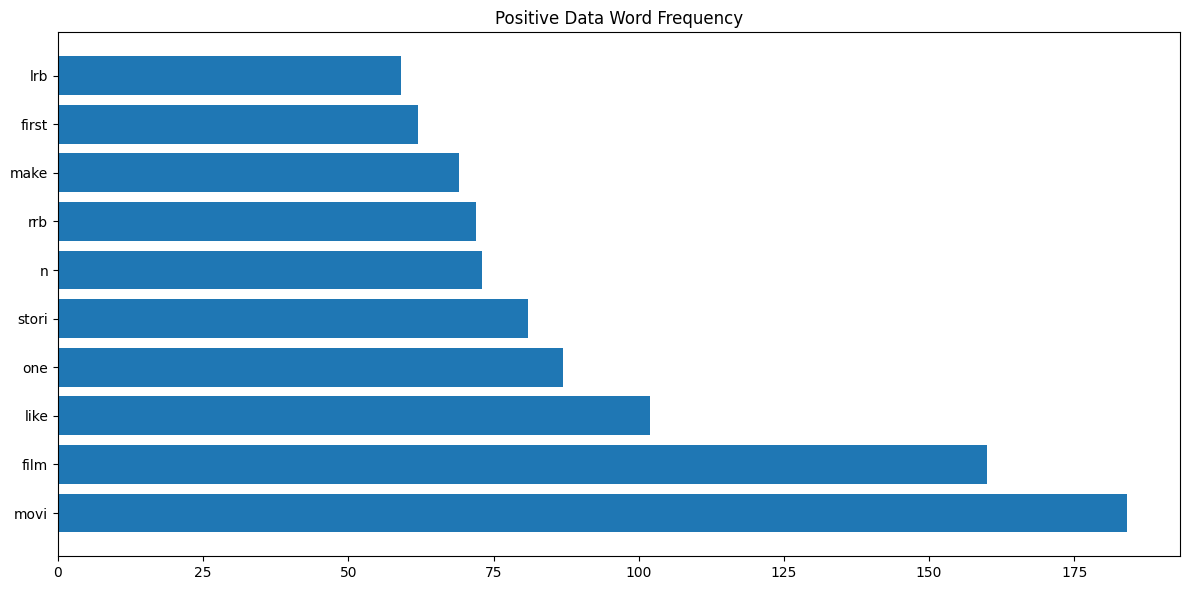

In [35]:
import matplotlib.pyplot as plt
from collections import Counter

positivedata = data[data['Sentiment'] == 2]
positivedata = positivedata['text']

positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)

fig, axes = plt.subplots(figsize=(12, 6))

axes.barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes.set_yticks(range(len(positivedata_common_words)))
axes.set_yticklabels([word for word, _ in positivedata_common_words])
axes.set_title('Positive Data Word Frequency')

plt.tight_layout()
plt.show()

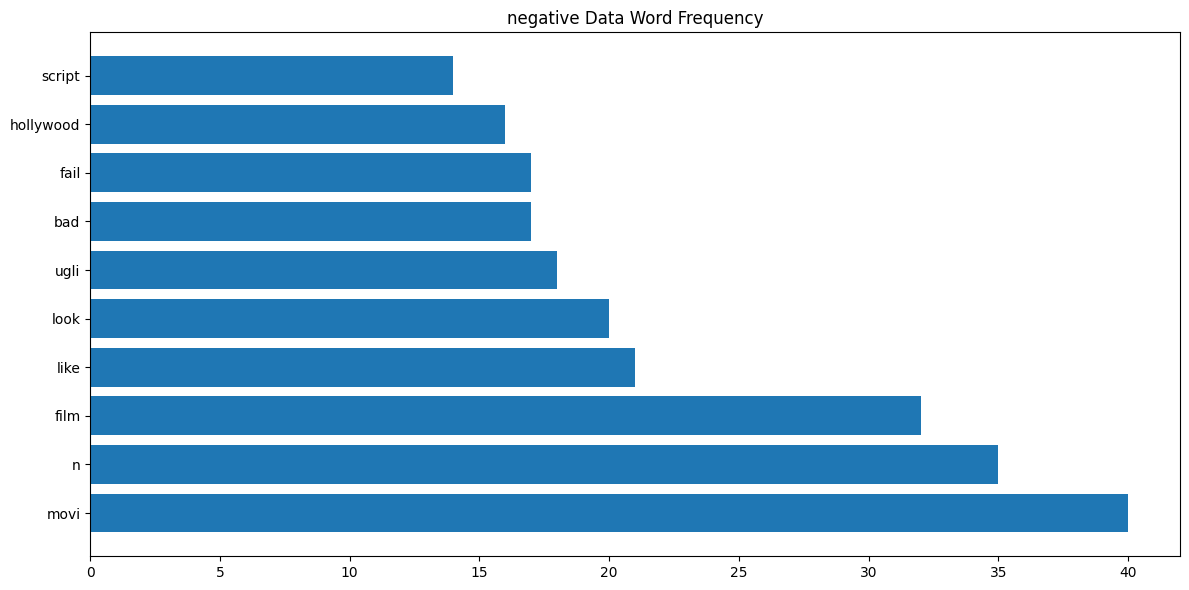

In [39]:
negativedata = data[data['Sentiment'] == 0]
negativedata = negativedata['text']

negativedata_words = ' '.join(negativedata).split()
negativedata_word_counts = Counter(negativedata_words)
negativedata_common_words = negativedata_word_counts.most_common(10)

fig, axes = plt.subplots(figsize=(12, 6))

axes.barh(range(len(negativedata_common_words)), [count for _, count in negativedata_common_words], align='center')
axes.set_yticks(range(len(negativedata_common_words)))
axes.set_yticklabels([word for word, _ in negativedata_common_words])
axes.set_title('negative Data Word Frequency')

plt.tight_layout()
plt.show()

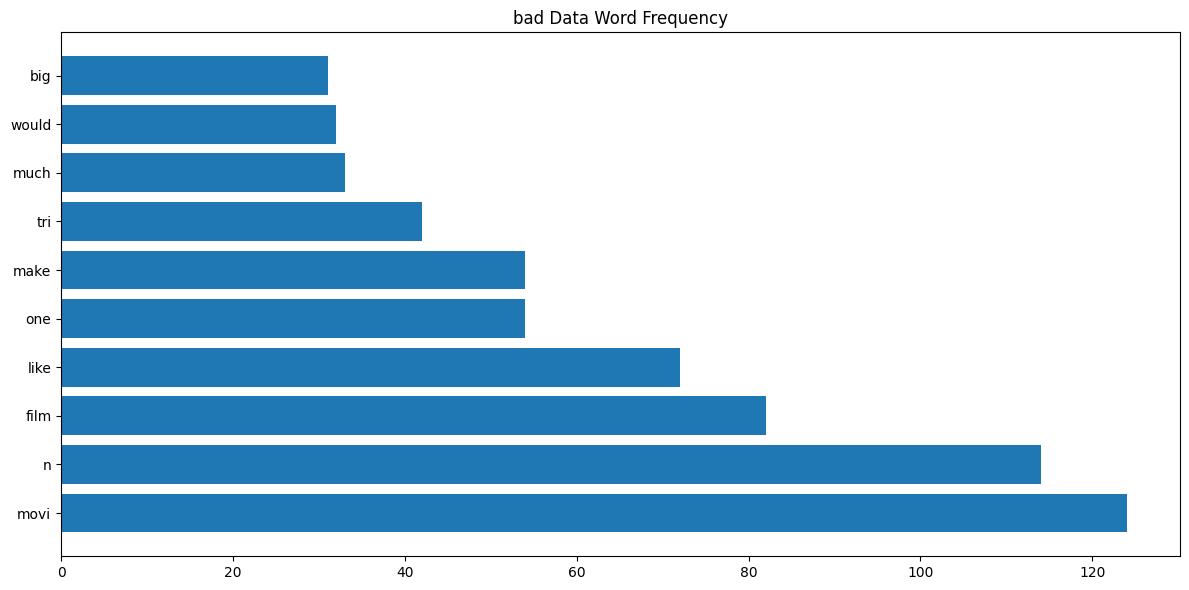

In [40]:
baddata = data[data['Sentiment'] == 1]
baddata = baddata['text']

baddata_words = ' '.join(baddata).split()
baddata_word_counts = Counter(baddata_words)
baddata_common_words = baddata_word_counts.most_common(10)

fig, axes = plt.subplots(figsize=(12, 6))

axes.barh(range(len(baddata_common_words)), [count for _, count in baddata_common_words], align='center')
axes.set_yticks(range(len(baddata_common_words)))
axes.set_yticklabels([word for word, _ in baddata_common_words])
axes.set_title('bad Data Word Frequency')

plt.tight_layout()
plt.show()

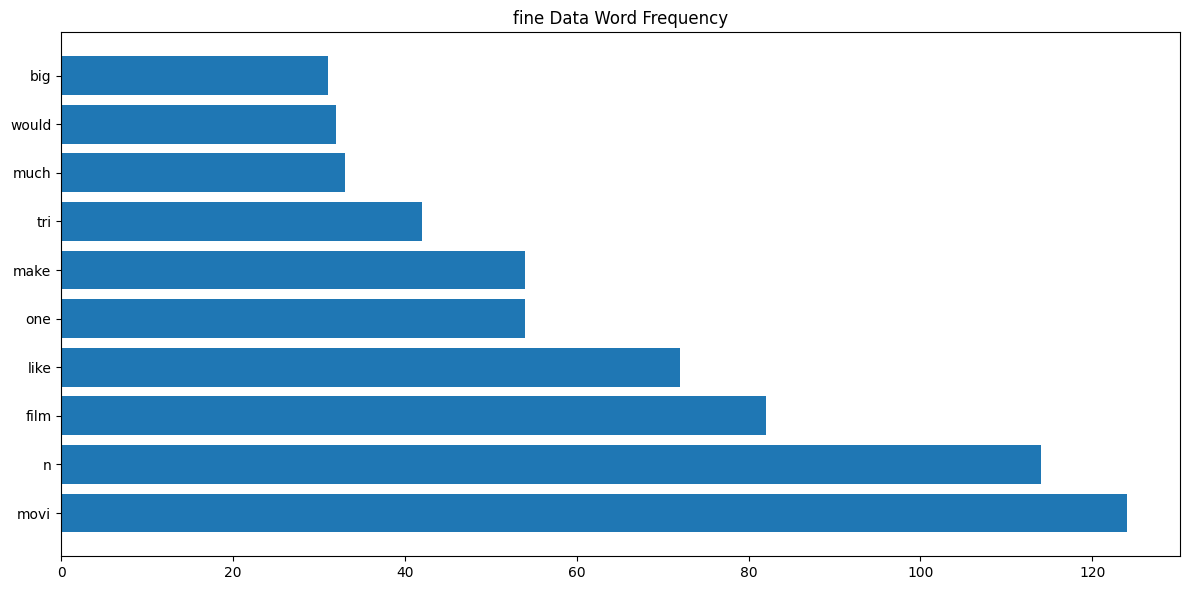

In [42]:
finedata = data[data['Sentiment'] == 3]
finedata = finedata['text']

finedata_words = ' '.join(baddata).split()
finedata_word_counts = Counter(baddata_words)
finedata_common_words = finedata_word_counts.most_common(10)

fig, axes = plt.subplots(figsize=(12, 6))

axes.barh(range(len(finedata_common_words)), [count for _, count in finedata_common_words], align='center')
axes.set_yticks(range(len(finedata_common_words)))
axes.set_yticklabels([word for word, _ in finedata_common_words])
axes.set_title('fine Data Word Frequency')

plt.tight_layout()
plt.show()

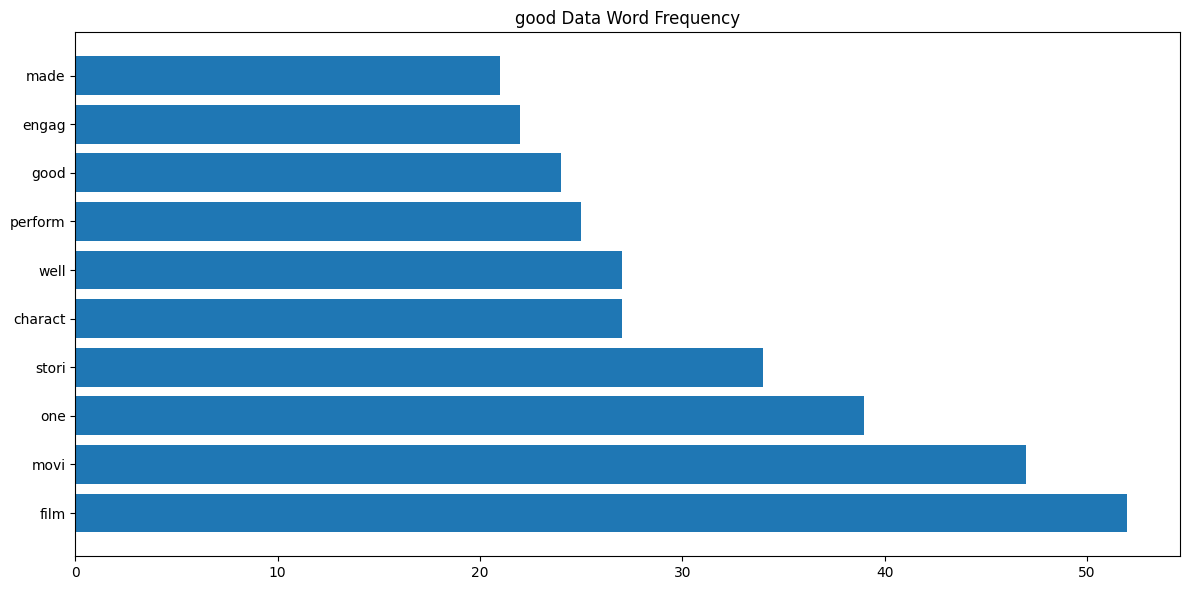

In [44]:
gooddata = data[data['Sentiment'] == 4]
gooddata = gooddata['text']

gooddata_words = ' '.join(gooddata).split()
gooddata_word_counts = Counter(gooddata_words)
gooddata_common_words = gooddata_word_counts.most_common(10)

fig, axes = plt.subplots(figsize=(12, 6))

axes.barh(range(len(gooddata_common_words)), [count for _, count in gooddata_common_words], align='center')
axes.set_yticks(range(len(gooddata_common_words)))
axes.set_yticklabels([word for word, _ in gooddata_common_words])
axes.set_title('good Data Word Frequency')

plt.tight_layout()
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.Sentiment.values
x=tfidf.fit_transform(data.text)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [48]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train)
y_pred = clf.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   19.3s finished


In [49]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5438


In [50]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [51]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction

In [52]:
prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [60]:


if prediction == 2:
    print("positive comment")
elif prediction == 1:
  print("bad comment")
elif prediction == 3:
  print("fine")
elif prediction == 4:
  print("good comment")
else:
    print("negative comment")


predicted_sentiment_2 = prediction("grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment")

positive comment


TypeError: 'numpy.int64' object is not callable